## Make labels

Crop one quadrant of the image to make a label.  Idea is to keep 3/4 of the image 'hidden' so we can do 'validation'

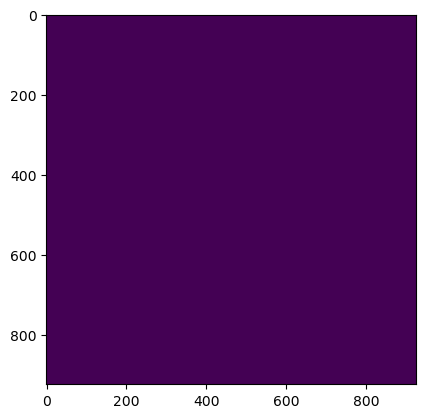

In [14]:
from skimage.io import imread
from pathlib import Path
from matplotlib import pyplot as plt
import napari
import numpy as np

tnia_images_path = Path("D:/images/tnia-python-images")
parent_path = tnia_images_path / "imagesc/2024_03_08_flower_like"

image = imread(str(parent_path / ("HP_1week_screenshot.jpg")))
segmented = imread(str(parent_path / ("segmented_ML_pixel.tif")))

outlines = np.zeros_like(segmented)
#outlines[segmented==3]=1

crop = np.s_[:image.shape[0]//2,image.shape[1]//2:image.shape[1]]

#label = outlines[:512,:512]

plt.imshow(outlines[crop])

In [20]:
viewer = napari.Viewer()
viewer.add_image(image[crop], name='image')
viewer.add_labels(outlines[crop], name='labels')

<Labels layer 'labels' at 0x1bea5cdb190>

In [21]:
from skimage.io import imsave
imsave(parent_path / "label.tif", outlines[crop].astype('uint16'))

C:\Users\bnort\AppData\Local\Temp\ipykernel_20928\1952159752.py:2: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_08_flower_like\label.tif is a low contrast image
  imsave(parent_path / "label.tif", outlines[crop].astype('uint16'))


In [22]:
imsave(parent_path / "image.tif", image[crop].astype('uint16'))

C:\Users\bnort\AppData\Local\Temp\ipykernel_20928\2474443712.py:1: UserWarning: D:\images\tnia-python-images\imagesc\2024_03_08_flower_like\image.tif is a low contrast image
  imsave(parent_path / "image.tif", image[crop].astype('uint16'))


In [8]:
label.dtype, image.dtype

(dtype('int32'), dtype('<u2'))